# Data Analysis Final Project
**Due Date:** January 29, 2026, 23:59  

**Group:** Cuircuit Synergy  

**Created By:** Jeremia Baumgartner, Lorenz Buchinger, Tim Zwölfer  

---
**Initial Setup**

In [4]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.rcParams.update({
    'figure.figsize': [6, 4],
    'figure.dpi': 150,
    'figure.autolayout': True,
    'axes.labelsize': 8,
    'axes.titlesize': 10,
    'font.size': 6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6
})

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

np.random.seed(42)

---
**Load Data**

In [ ]:
df_csv_data = pd.read_csv('traffic_accidents.csv')
df_csv_data_raw = df_csv_data # Keep a raw copy

---
## A. Data Preprocessing and Data Quality (70 points)
---
**Assigned to Lorenz**
- Dataset overview (dimensions, columns, types, time range, sampling rate, missingness
summary) (10 points)
- Basic statistical analysis using pandas (descriptives, grouped stats, quantiles) (10 points)
- Original data quality analysis with visualization (missingness patterns, outliers, dupli-
cates, timestamp gaps, inconsistent units) (20 points)
- Data preprocessing pipeline (cleaning steps, handling missing data, outliers strategy, re-
sampling or alignment if needed, feature engineering basics) (20 points)
- Preprocessed vs original comparison (before/after visuals plus commentary on what changed
and why) (10 points)

### Dataset Overview  
**Dimensions**

In [27]:
print("The dataset contains", df_csv_data.shape[0], "rows and", df_csv_data.shape[1], "columns.")

The dataset contains 209306 rows and 24 columns.


**Columns and types**

In [26]:
schema_table = (
    df_csv_data.dtypes
    .reset_index()
    .rename(columns={"index": "column", 0: "dtype"})
)

schema_table

,column,dtype
0,crash_date,datetime64[ns]
1,traffic_control_device,object
2,weather_condition,object
3,lighting_condition,object
4,first_crash_type,object
5,trafficway_type,object
6,alignment,object
7,roadway_surface_cond,object
8,road_defect,object
9,crash_type,object


**Time Range**

In [25]:
first_date = df_csv_data["crash_date"].min()
last_date = df_csv_data["crash_date"].max()

print("First entry date:", first_date)
print("Last entry date:", last_date)

First entry date: 2013-03-03 16:48:00
Last entry date: 2025-01-18 00:17:00


**Sampling Rate**  
There is no constant sampling rate since car accidents don't happen in fixed intervals.

**Missingness Summary**  
Missing values in the dataset are encoded using the string 'UNKNOWN' rather than null values.

In [31]:
num_values_total = df_csv_data_raw.shape[0] * df_csv_data_raw.shape[1]
print("Total number of values in the dataset:", num_values_total)

unknown_total = (df_csv_data_raw == "UNKNOWN").sum().sum()
print("Total UNKNOWN values:", unknown_total)

unknown_percentage = (unknown_total / num_values_total) * 100
print(f"Percentage of UNKNOWN values: {unknown_percentage:.2f}%")

Total number of values in the dataset: 5023344
Total UNKNOWN values: 63320
Percentage of UNKNOWN values: 1.26%


In [35]:
missing_summary = pd.DataFrame({
    "missing_count": (df_csv_data_raw == "UNKNOWN").sum(),
    "missing_percent": ((df_csv_data_raw == "UNKNOWN").mean() * 100).round(2)
}).sort_values(by="missing_percent", ascending=False)

missing_summary

,missing_count,missing_percent
road_defect,34426,16.45
roadway_surface_cond,12509,5.98
weather_condition,6534,3.12
traffic_control_device,4455,2.13
lighting_condition,4336,2.07
trafficway_type,1060,0.51
crash_date,0,0.00
injuries_total,0,0.00
crash_day_of_week,0,0.00
crash_hour,0,0.00


### Basic Statistical Analysis Using Pandas (descriptives, grouped stats, quantiles)

**Descriptive Analysis**  
Qantiles, min., max., mean value and standard deviation of all columns.

In [33]:
df_csv_data = df_csv_data.replace("UNKNOWN", np.nan)
df_csv_data.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [16]:
quantiles = df_csv_data.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
quantiles

C:\Users\conta\AppData\Local\Temp\ipykernel_2848\4224539621.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = df_csv_data.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])


,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0.01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
0.05,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
0.25,2.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,2.0,4.0
0.50,2.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,4.0,7.0
0.75,2.0,1.0,0.0,0.0,0.0,0.0,3.0,17.0,6.0,10.0
0.95,3.0,2.0,0.0,0.0,1.0,1.0,4.0,22.0,7.0,12.0
0.99,4.0,4.0,0.0,1.0,3.0,2.0,6.0,23.0,7.0,12.0


**Grouped Stats**

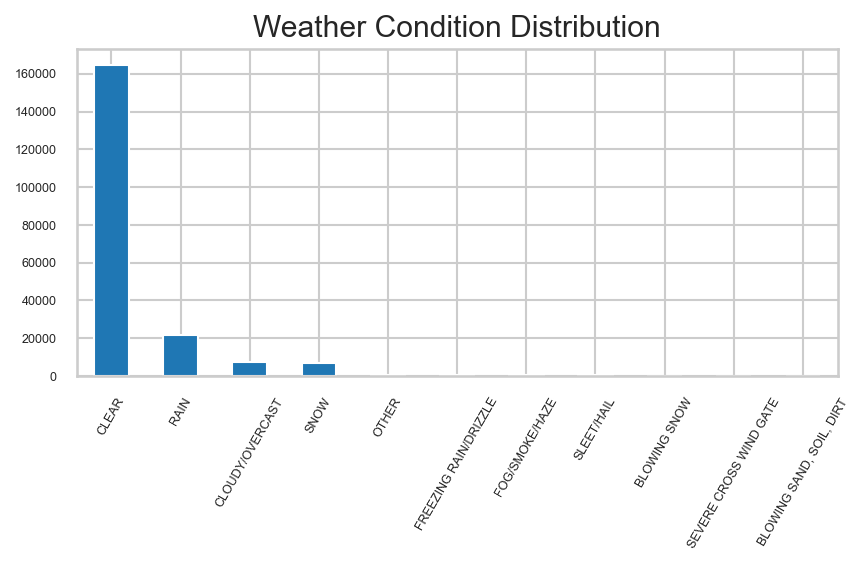

In [26]:
ax = df_csv_data["weather_condition"].value_counts().plot(kind="bar", title="Weather Condition Distribution")
ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis="x", rotation=60)

In [36]:
# Analysis of correlation between injuries and weather condition
df_csv_data.groupby("weather_condition")["injuries_total"].agg(
    ["count", "mean", "median", "std"]
)

,count,mean,median,std
weather_condition,,,,
"BLOWING SAND, SOIL, DIRT",1,0.000000,0.0,NaN
BLOWING SNOW,127,0.314961,0.0,0.752781
CLEAR,164700,0.390401,0.0,0.812737
CLOUDY/OVERCAST,7533,0.369308,0.0,0.745190
FOG/SMOKE/HAZE,360,0.444444,0.0,0.829285
FREEZING RAIN/DRIZZLE,510,0.460784,0.0,0.864851
OTHER,627,0.483254,0.0,0.821607
RAIN,21703,0.411510,0.0,0.808552
SEVERE CROSS WIND GATE,32,0.250000,0.0,0.762001


In [37]:
# Analysis of correlation between injuries and time of day
df_csv_data.groupby("crash_hour")["injuries_total"].agg(
    ["count", "mean", "median", "std"]
)

,count,mean,median,std
crash_hour,,,,
0,4487,0.537330,0.0,0.969841
1,3729,0.534191,0.0,0.974719
2,3080,0.579221,0.0,1.078996
3,2364,0.537225,0.0,0.976171
4,2104,0.480989,0.0,0.875850
5,2819,0.431004,0.0,0.813593
6,4772,0.397737,0.0,0.799431
7,9405,0.360978,0.0,0.747282
8,11381,0.349354,0.0,0.729552


### Original data quality analysis with visualization
**Missingness Patterns**

In [38]:
missing_counts = df_csv_data.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

road_defect               34426
roadway_surface_cond      12509
weather_condition          6534
traffic_control_device     4455
lighting_condition         4336
trafficway_type            1060
dtype: int64

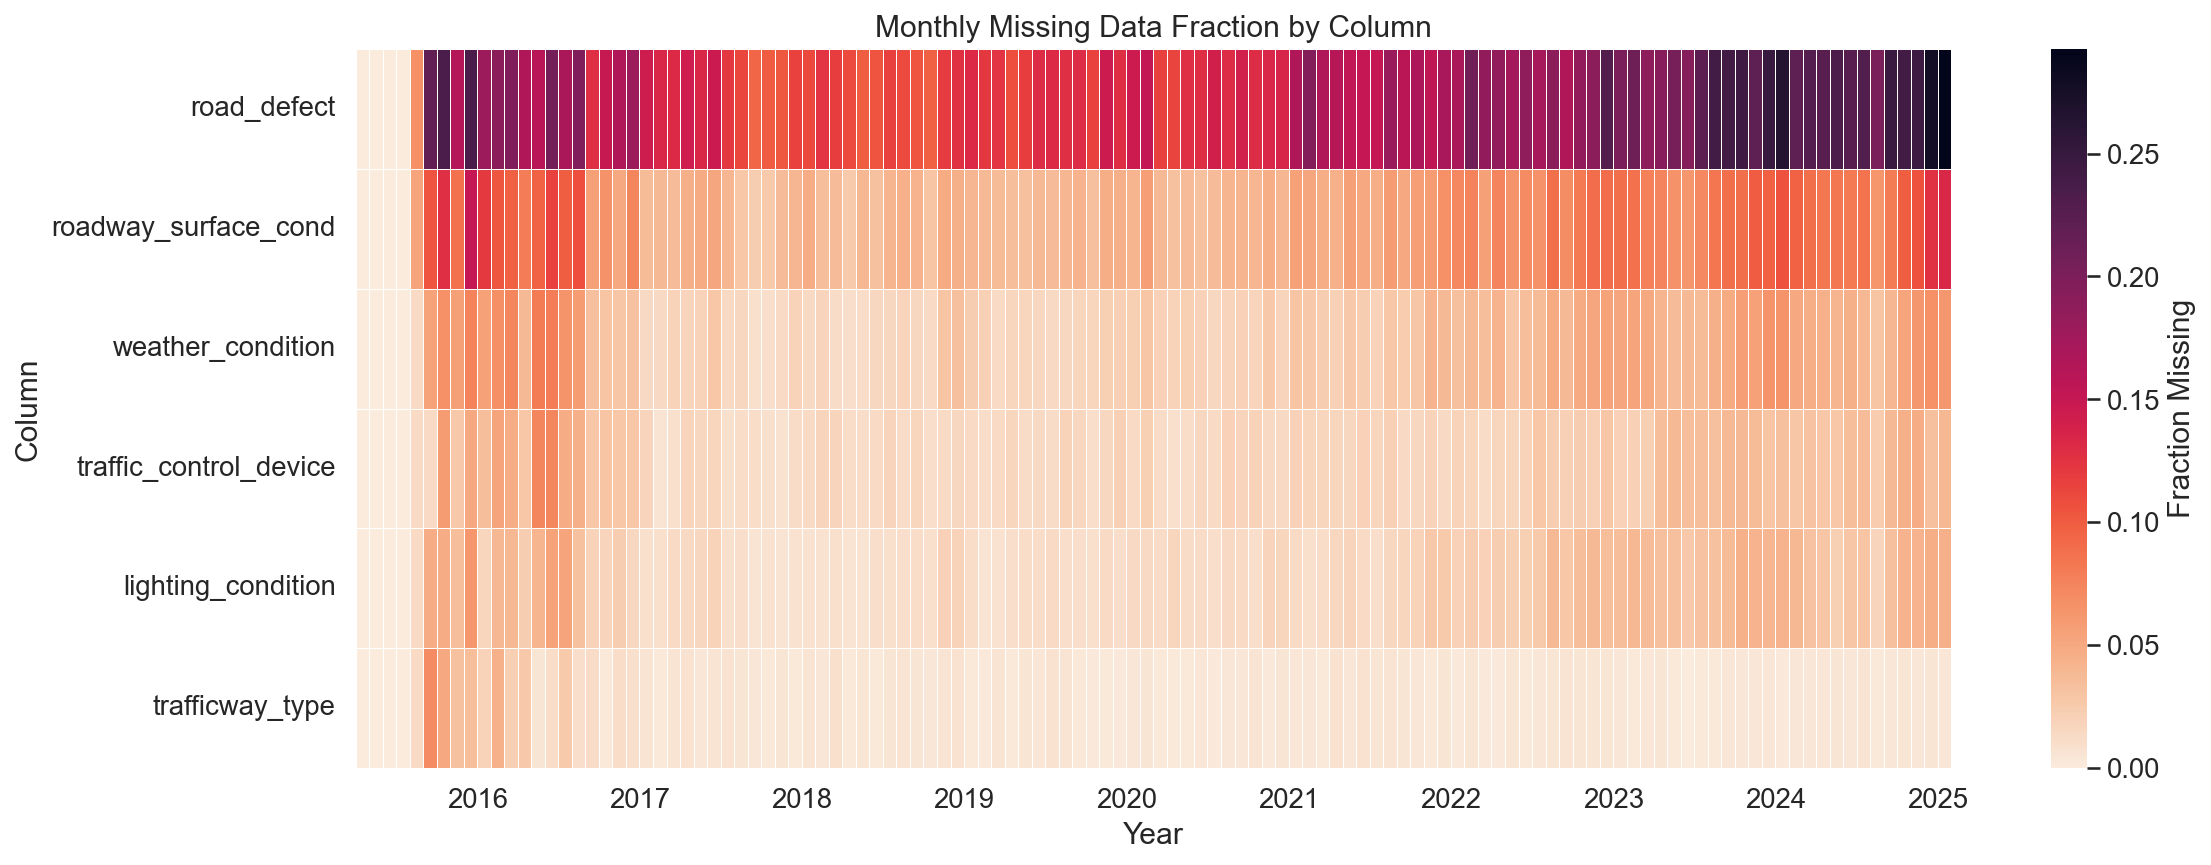

In [23]:
# Ensure datetime
df = df_csv_data.copy()
df["crash_date"] = pd.to_datetime(df["crash_date"])

# Keep only relevant columns
df = df[["crash_date"] + cols]

# Create monthly period
df["month"] = df["crash_date"].dt.to_period("M")

# Calculate fraction missing per month per column
monthly_missing = (
    df.groupby("month")[cols]
      .apply(lambda x: x.isna().mean())
)

# Convert PeriodIndex to timestamp for plotting
monthly_missing.index = monthly_missing.index.to_timestamp()

# Plot heatmap
plt.figure(figsize=(16, 6))
ax = sns.heatmap(
    monthly_missing.T,
    cmap="rocket_r",
    cbar_kws={"label": "Fraction Missing"},
    linewidths=0.3
)

# Year-only x-axis ticks
months = monthly_missing.index
year_ticks = [i for i, d in enumerate(months) if d.month == 1]
year_labels = [d.year for d in months if d.month == 1]

ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels, rotation=0)

plt.title("Monthly Missing Data Fraction by Column")
plt.xlabel("Year")
plt.ylabel("Column")
plt.tight_layout()
plt.show()


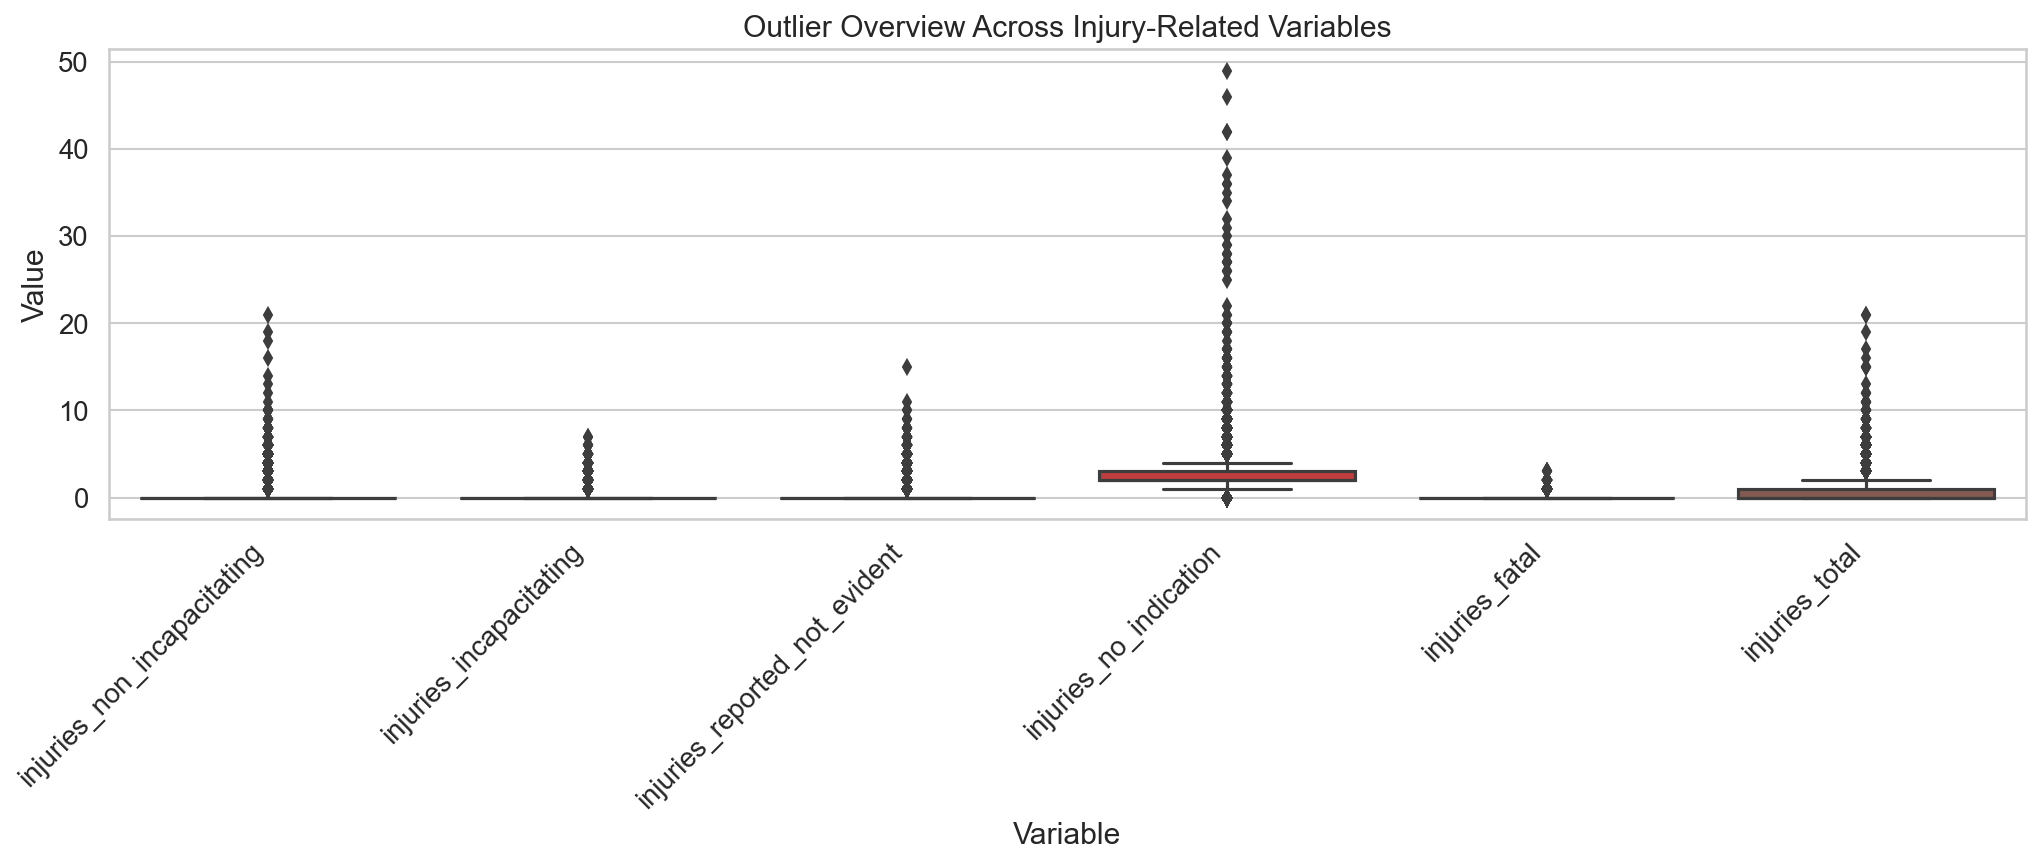

In [66]:
col_names = [
    "injuries_non_incapacitating",
    "injuries_incapacitating",
    "injuries_reported_not_evident",
    "injuries_no_indication",
    "injuries_fatal",
    "injuries_total"
]

selected_cols = df_csv_data[col_names]

df_melted = selected_cols.melt(
    var_name="Variable",
    value_name="Value"
)

plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_melted,
    x="Variable",
    y="Value",
    showfliers=True
)
plt.xticks(rotation=45, ha="right")
plt.title("Outlier Overview Across Injury-Related Variables")
plt.tight_layout()
plt.show()

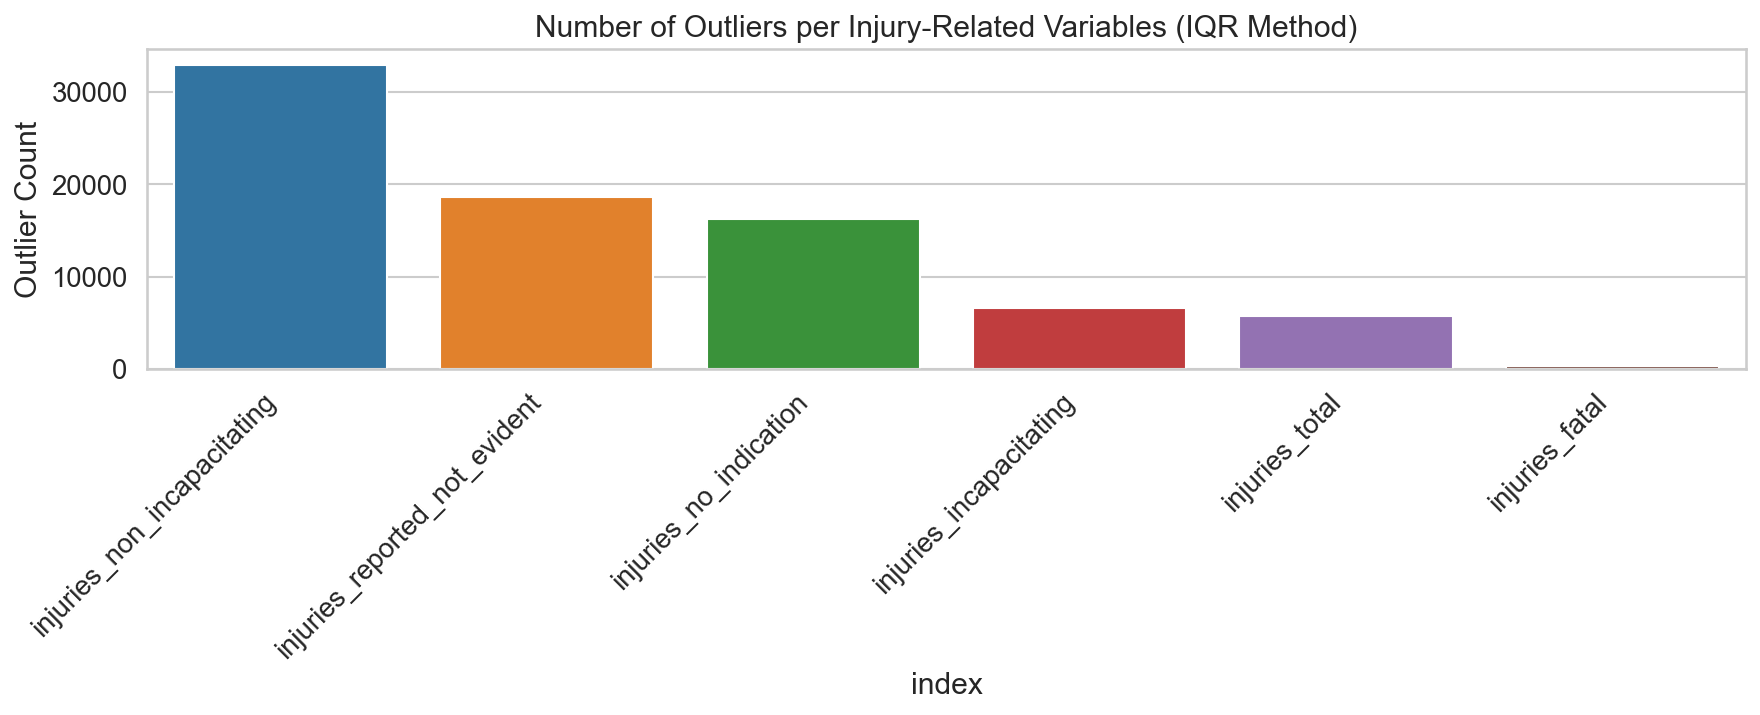

In [ ]:
outlier_counts = {}

for col in col_names:
    Q1 = df_csv_data[col].quantile(0.25)
    Q3 = df_csv_data[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (
        (df_csv_data[col] < Q1 - 1.5 * IQR) |
        (df_csv_data[col] > Q3 + 1.5 * IQR)
    )

    outlier_counts[col] = outliers.sum()

outlier_df = (
    pd.DataFrame.from_dict(
        outlier_counts,
        orient="index",
        columns=["Outlier Count"]
    )
    .sort_values("Outlier Count", ascending=False)
)

plt.figure(figsize=(12,5))
sns.barplot(
    data=outlier_df.reset_index(),
    x="index",
    y="Outlier Count"
)
plt.xticks(rotation=45, ha="right")
plt.title("Number of Outliers per Injury-Related Variables (IQR Method)")
plt.tight_layout()
plt.show()

In [ ]:
# Check for typos, different capitalizations, or inconsistent entries in categorical columns

for col in df_csv_data.select_dtypes(include="object"):
    print(col)
    print(df_csv_data[col].value_counts().head())
    print("-"*40)

# No typos or inconsistencies found in categorical columns

traffic_control_device
TRAFFIC SIGNAL       123944
STOP SIGN/FLASHER     49139
NO CONTROLS           29508
OTHER                   670
YIELD                   468
Name: traffic_control_device, dtype: int64
----------------------------------------
weather_condition
CLEAR              164700
RAIN                21703
CLOUDY/OVERCAST      7533
SNOW                 6871
OTHER                 627
Name: weather_condition, dtype: int64
----------------------------------------
lighting_condition
DAYLIGHT                  134109
DARKNESS, LIGHTED ROAD     53378
DARKNESS                    7436
DUSK                        6323
DAWN                        3724
Name: lighting_condition, dtype: int64
----------------------------------------
first_crash_type
TURNING                     64157
ANGLE                       52250
REAR END                    42018
SIDESWIPE SAME DIRECTION    20116
PEDESTRIAN                   8996
Name: first_crash_type, dtype: int64
--------------------------------------

**Analysis of Timestamp Gaps**

In [52]:
# Ensure datetime and sort
df = df_csv_data.copy()
df["crash_date"] = pd.to_datetime(df["crash_date"])
df = df.sort_values("crash_date")

# Calculate gaps between consecutive accidents
df["time_gap"] = df["crash_date"].diff()

# Drop the first row (NaT gap)
gaps = df.dropna(subset=["time_gap"])

# Filter gaps greater than 1 day
long_gaps = (
    gaps[gaps["time_gap"] > pd.Timedelta(days=1)]
    [["crash_date", "time_gap"]]
    .rename(columns={"crash_date": "gap_end"})
)

# Add gap start for clarity
long_gaps["gap_start"] = long_gaps["gap_end"] - long_gaps["time_gap"]

# Optional: sort largest gaps first
long_gaps = long_gaps.sort_values("time_gap", ascending=False)

long_gaps


,gap_end,time_gap,gap_start
121162,2015-02-13 08:00:00,621 days 11:31:00,2013-06-01 20:29:00
132318,2015-05-25 23:38:00,101 days 15:38:00,2015-02-13 08:00:00
23119,2013-06-01 20:29:00,90 days 03:41:00,2013-03-03 16:48:00
106211,2015-08-02 19:55:00,68 days 20:17:00,2015-05-25 23:38:00
46652,2015-08-14 09:30:00,2 days 19:15:00,2015-08-11 14:15:00
42585,2015-08-06 10:00:00,1 days 19:30:00,2015-08-04 14:30:00
1958,2015-08-10 09:15:00,1 days 12:00:00,2015-08-08 21:15:00
15595,2015-08-17 01:11:00,1 days 10:11:00,2015-08-15 15:00:00
96371,2015-08-11 14:15:00,1 days 05:00:00,2015-08-10 09:15:00


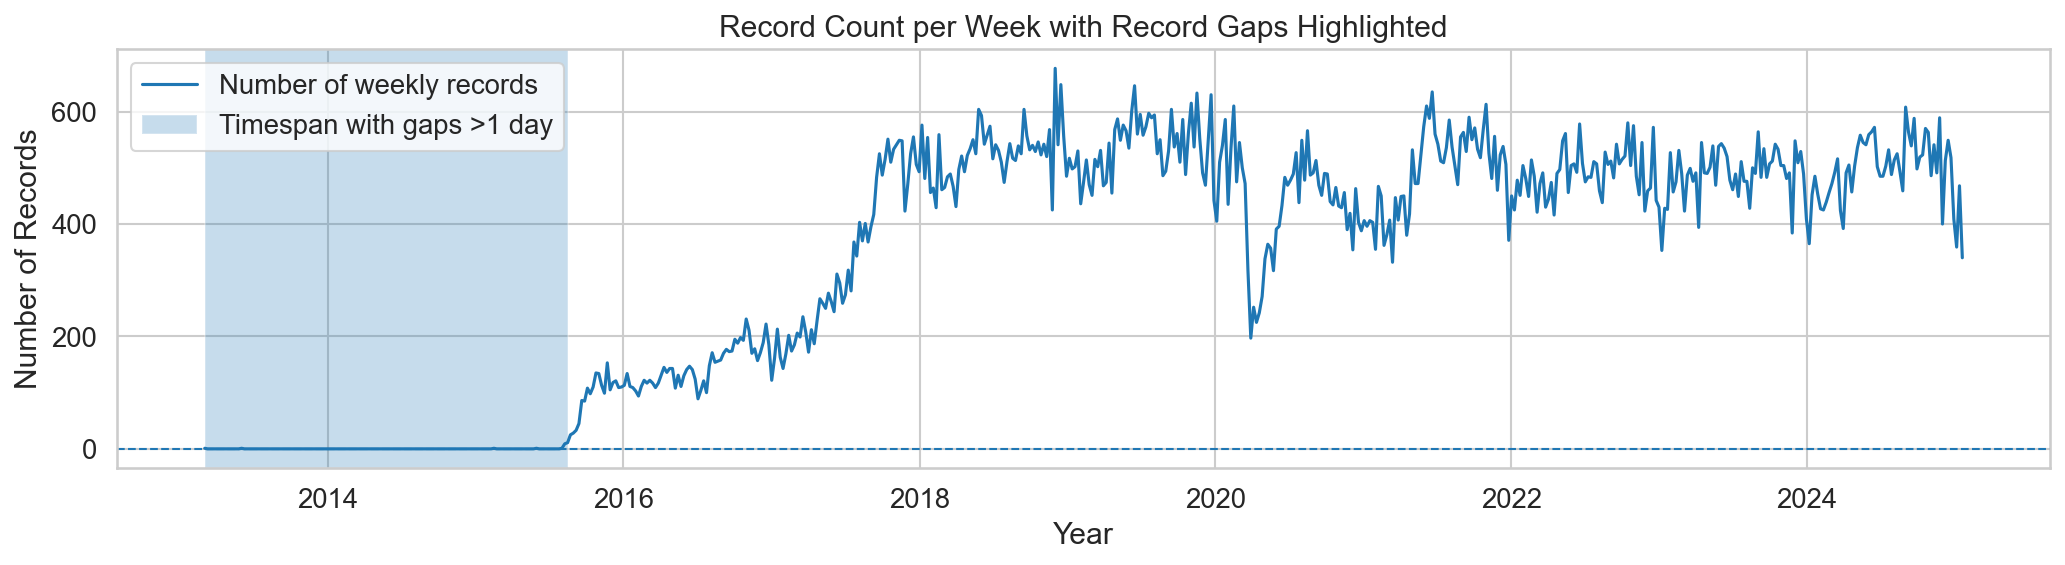

In [64]:
# Ensure datetime
df["crash_date"] = pd.to_datetime(df["crash_date"])

# Weekly record counts
weekly_counts = (
    df.set_index("crash_date")
      .resample("W")
      .size()
)

# Compute overall gap span
gap_span_start = long_gaps["gap_start"].min()
gap_span_end = long_gaps["gap_end"].max()

# Plot full timeline
plt.figure(figsize=(14, 4))
plt.plot(weekly_counts.index, weekly_counts.values, label="Number of weekly records")
plt.axhline(0, linestyle="--", linewidth=1)

# Highlight overall gap timespan
plt.axvspan(
    gap_span_start,
    gap_span_end,
    alpha=0.25,
    label="Timespan with gaps >1 day"
)

plt.title("Record Count per Week with Record Gaps Highlighted")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.legend()

plt.tight_layout()
plt.show()


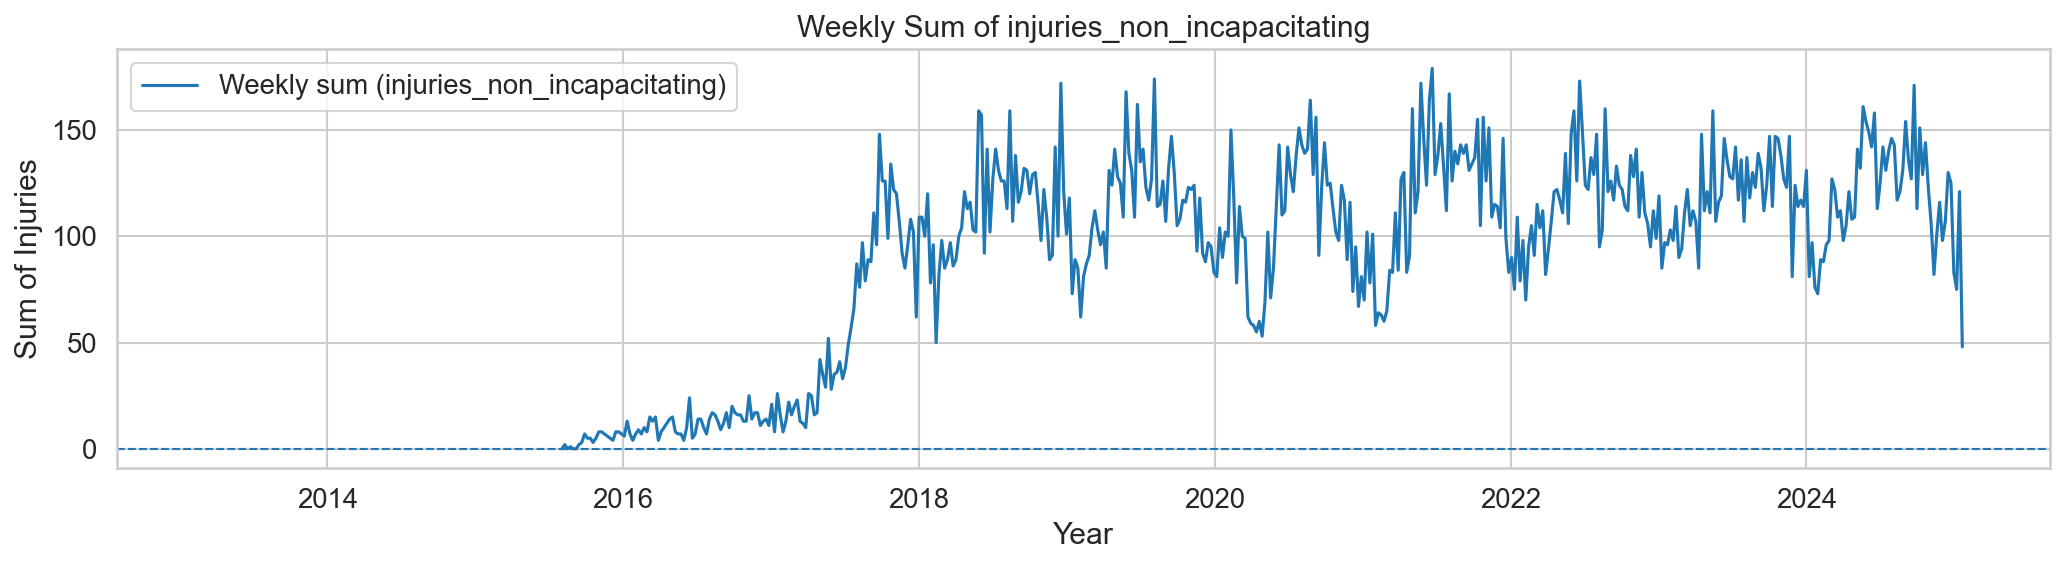

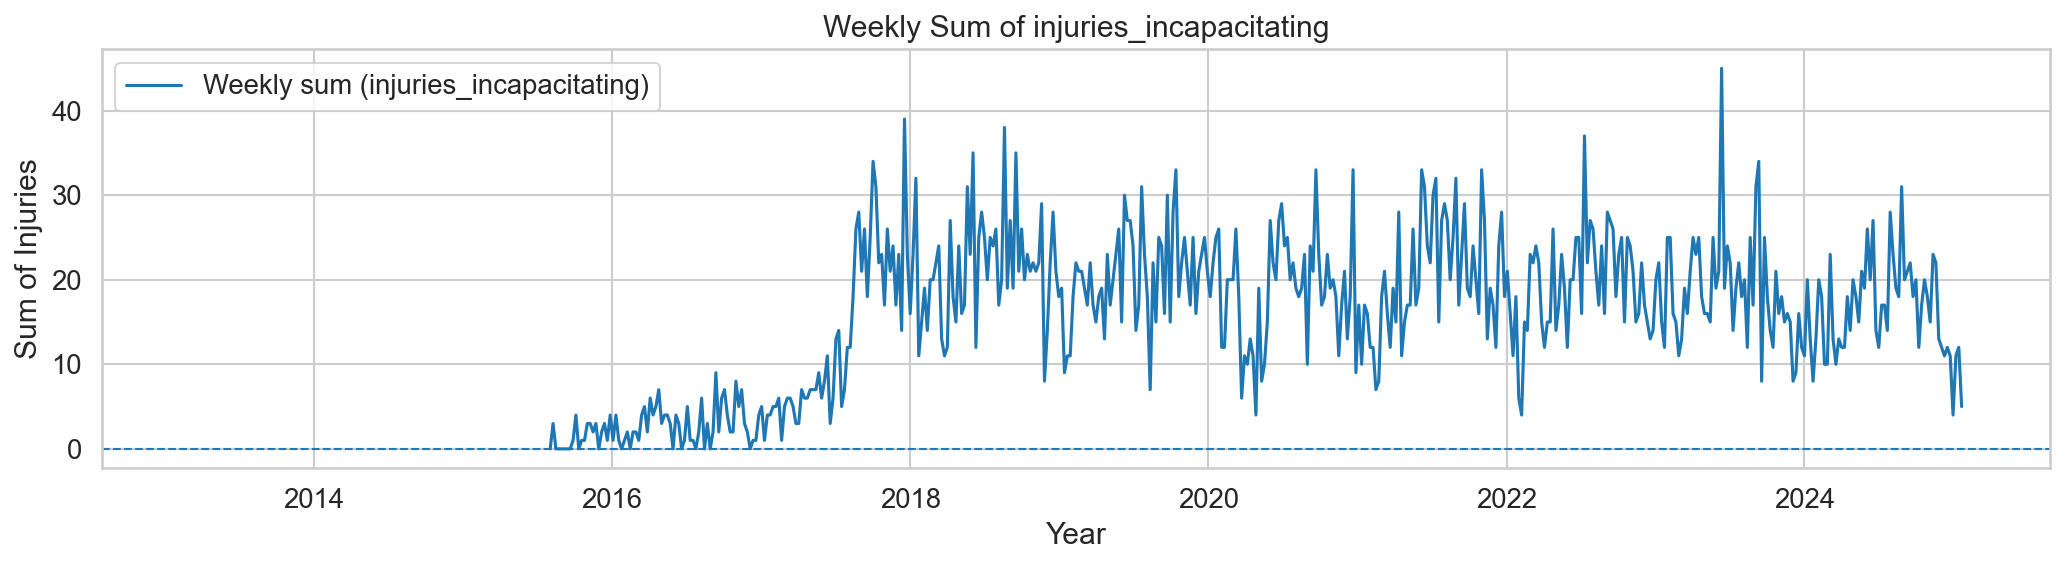

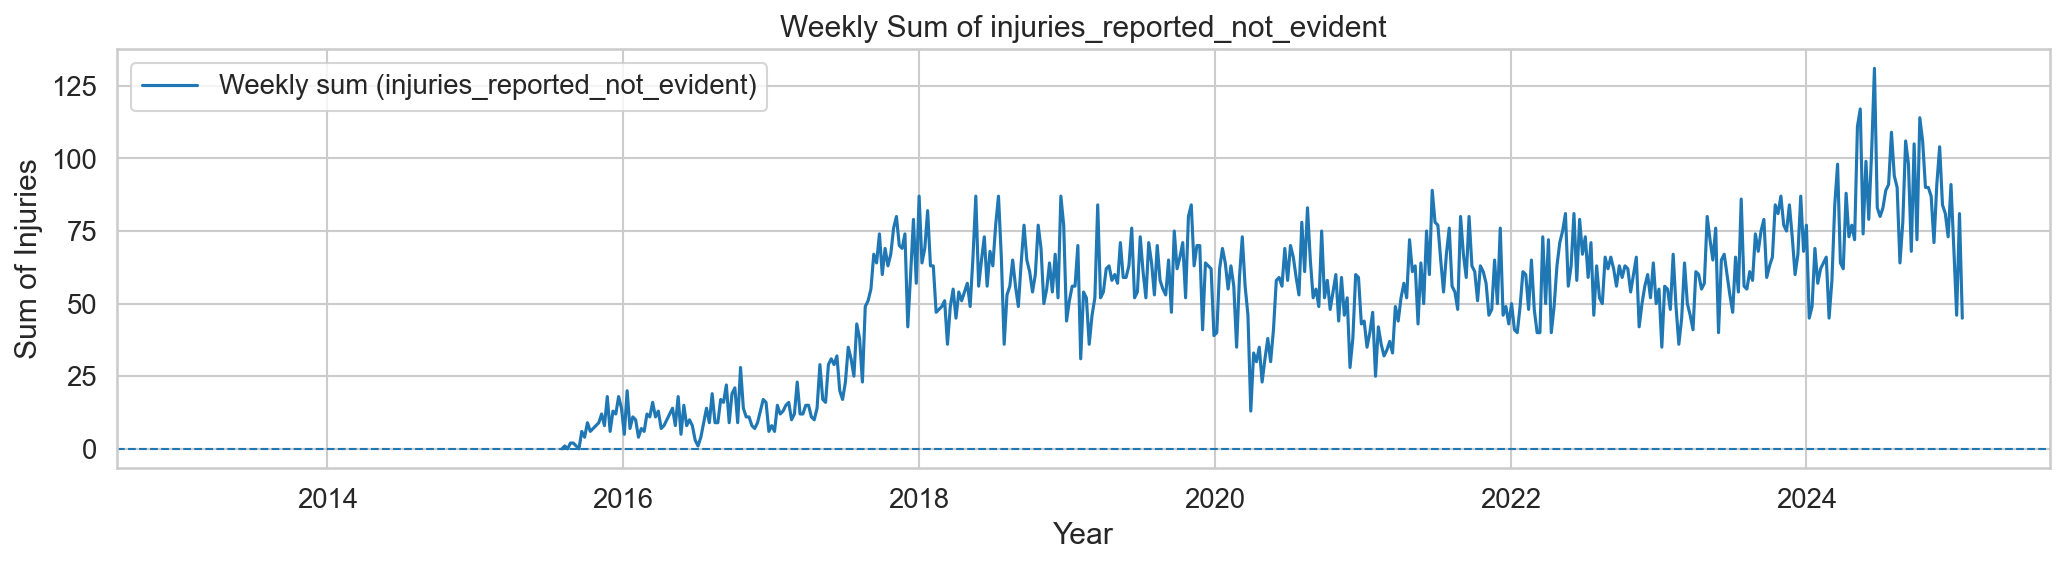

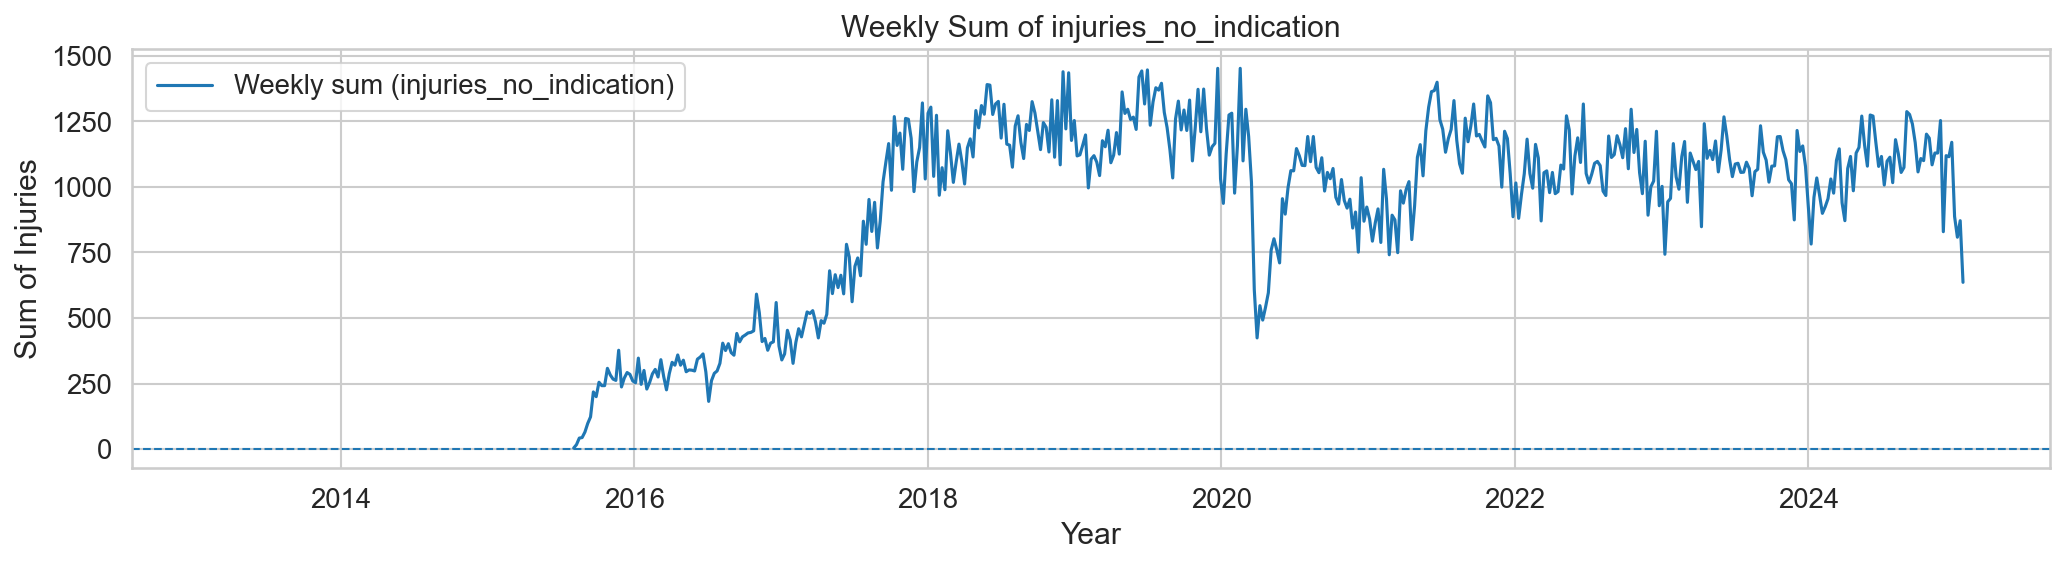

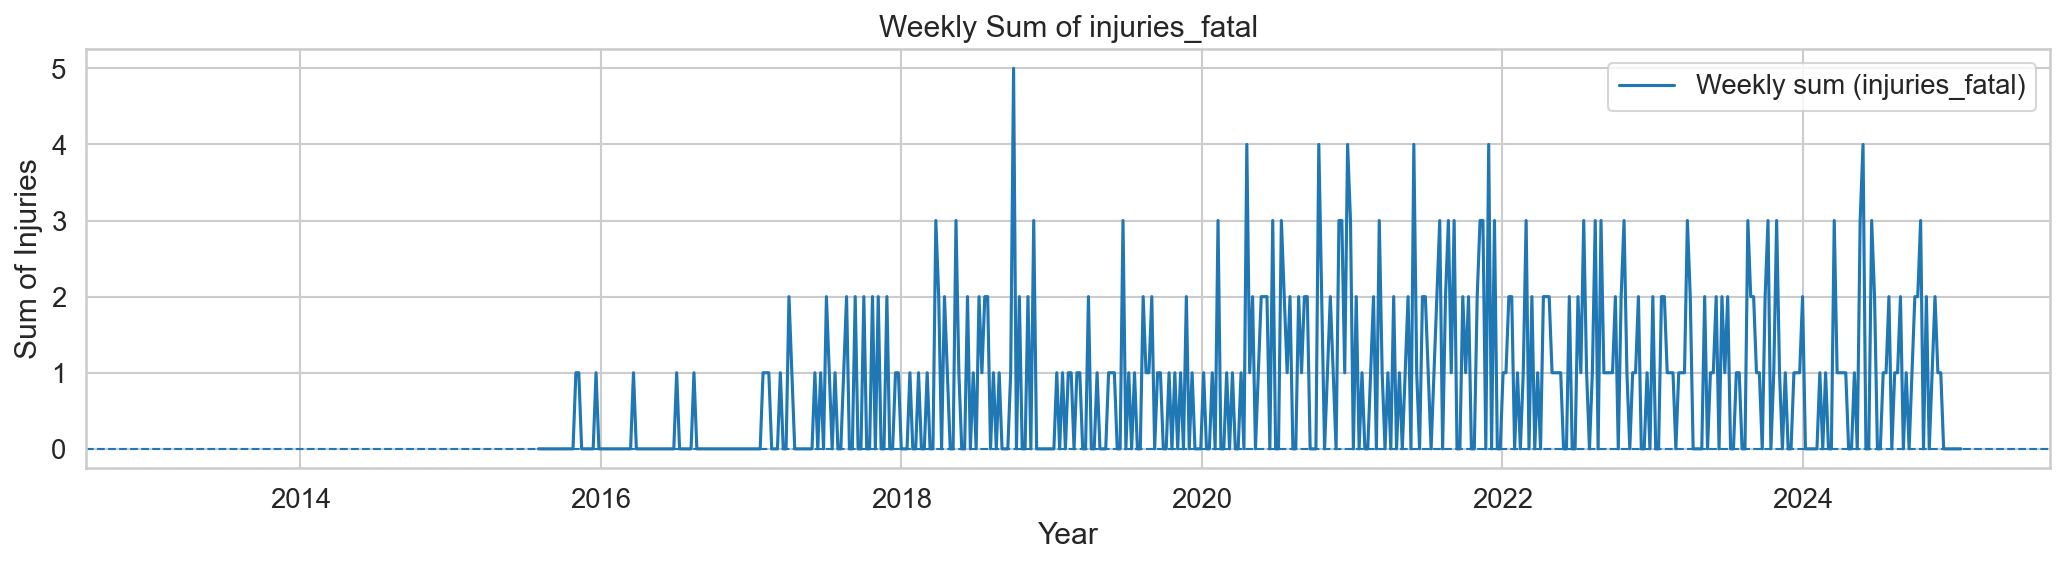

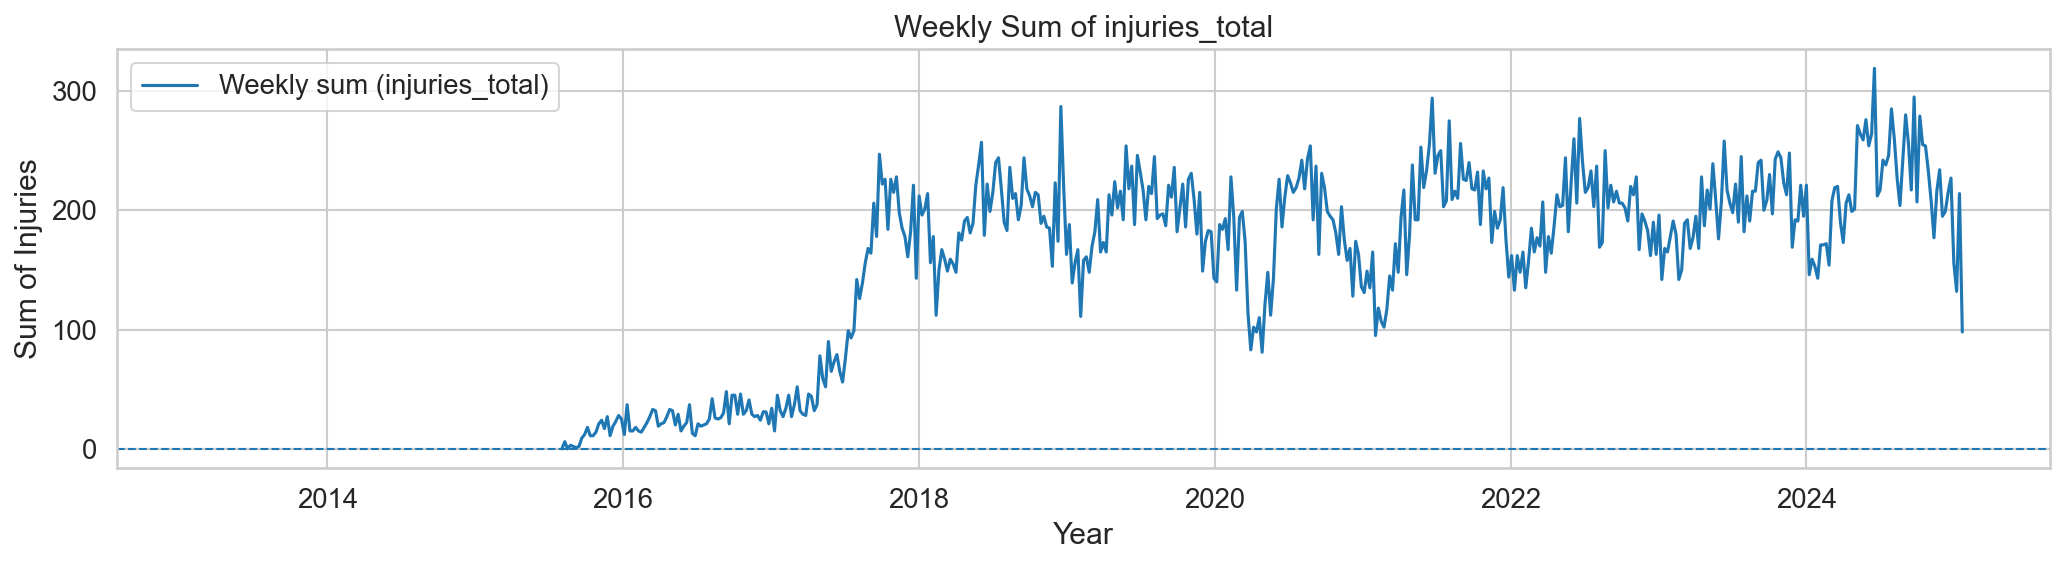

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime
df_plot = df_csv_data.copy()
df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])

# Loop through injury columns
for col in col_names:
    if col not in df_plot.columns:
        print(f"Skipping {col}: column not found.")
        continue

    # Resample weekly and sum values
    weekly_sum_col = (
        df_plot.set_index("crash_date")[col]
        .resample("W-MON")
        .sum(min_count=1)  # min_count=1 ensures empty weeks show NaN instead of 0
    )

    # Plot
    plt.figure(figsize=(14, 4))
    plt.plot(weekly_sum_col.index, weekly_sum_col.values, label=f"Weekly sum ({col})")
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title(f"Weekly Sum of {col}")
    plt.xlabel("Year")
    plt.ylabel("Sum of Injuries")
    plt.legend()
    plt.tight_layout()
    plt.show()


**Cleaning Data**
To clean the data the decision was made to remove all data entries before November of 2017. The reason for that is that there is way more data being sampled after that. The sampling frequency seems inconsistent before and rather consisten after November fo 2017.

In [ ]:
# Make a copy and ensure datetime
df_csv_data_cleaned = df_csv_data.copy()
df_csv_data_cleaned["crash_date"] = pd.to_datetime(df_csv_data_cleaned["crash_date"])

# Remove entries before November 2017
df_csv_data_cleaned = df_csv_data_cleaned[df_csv_data_cleaned["crash_date"] >= "2017-11-01"]

Visualizing removed data.

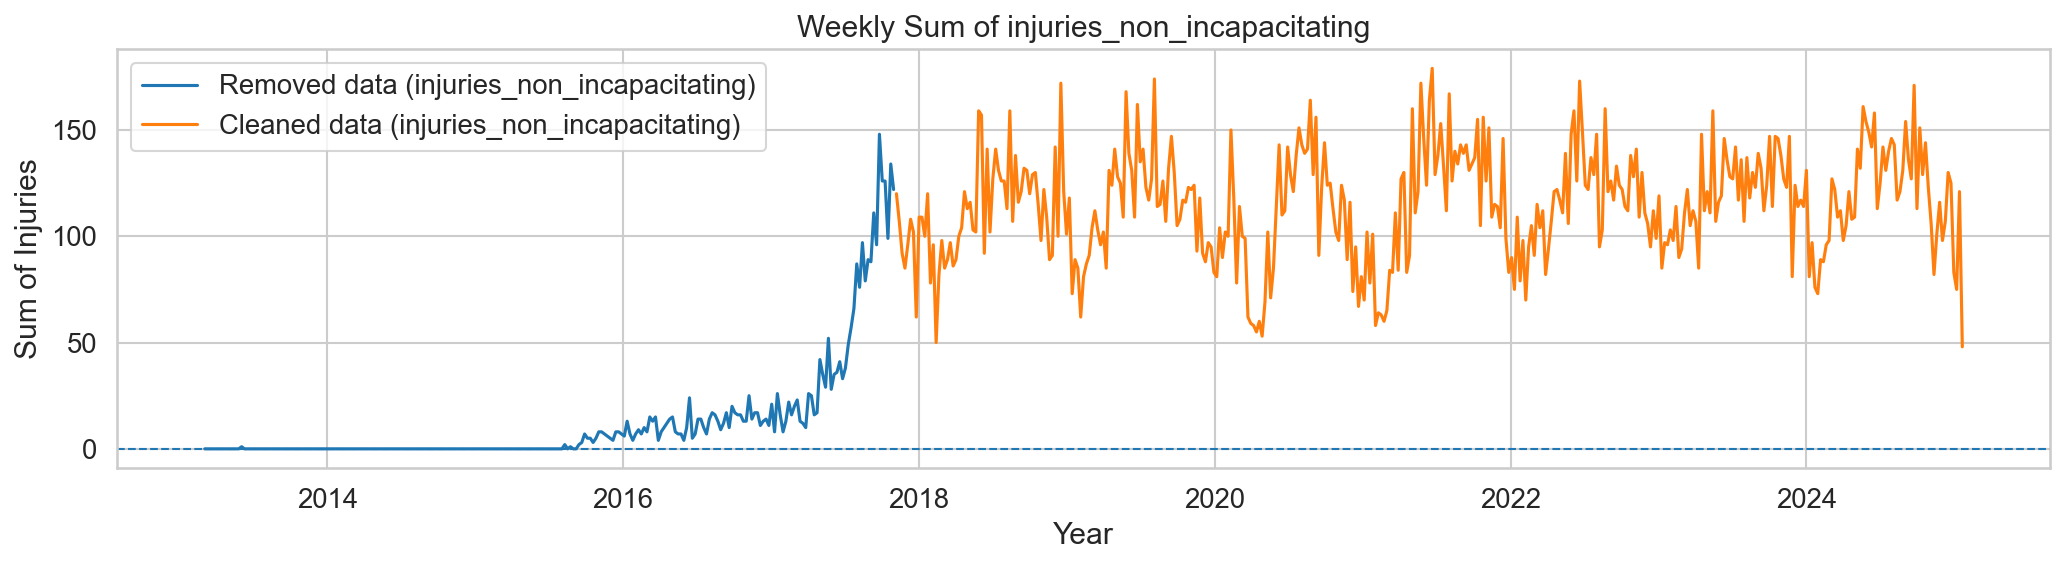

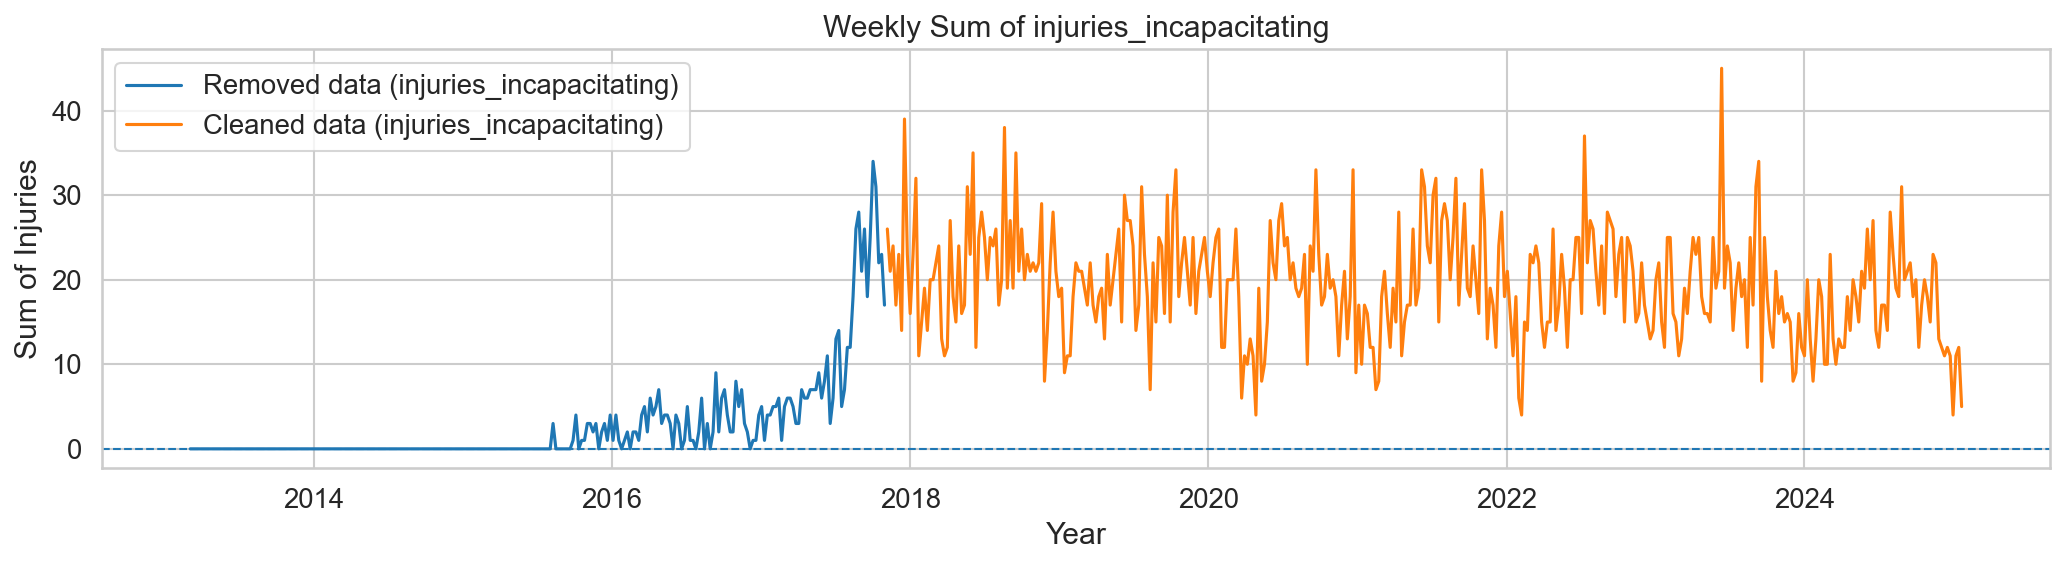

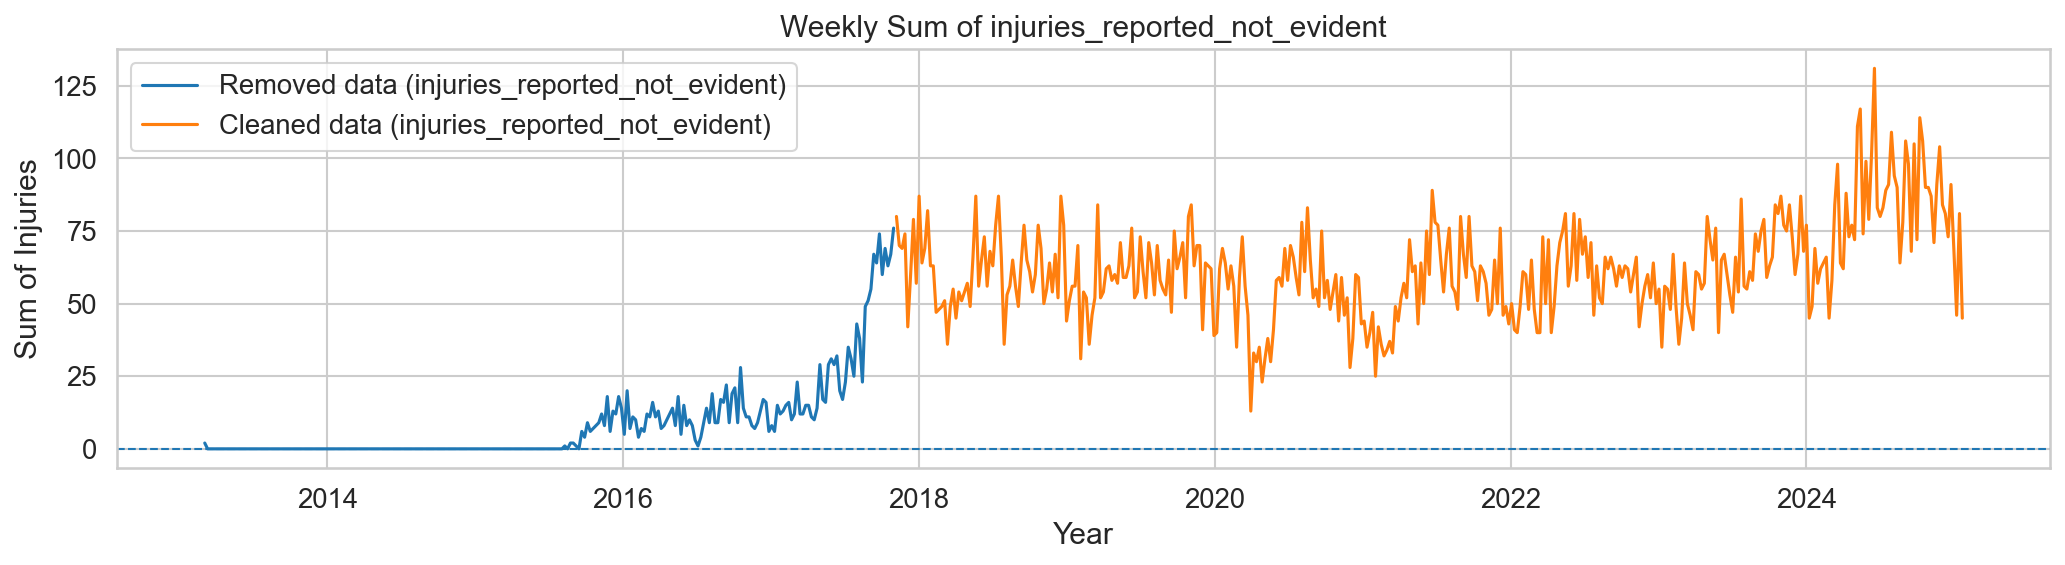

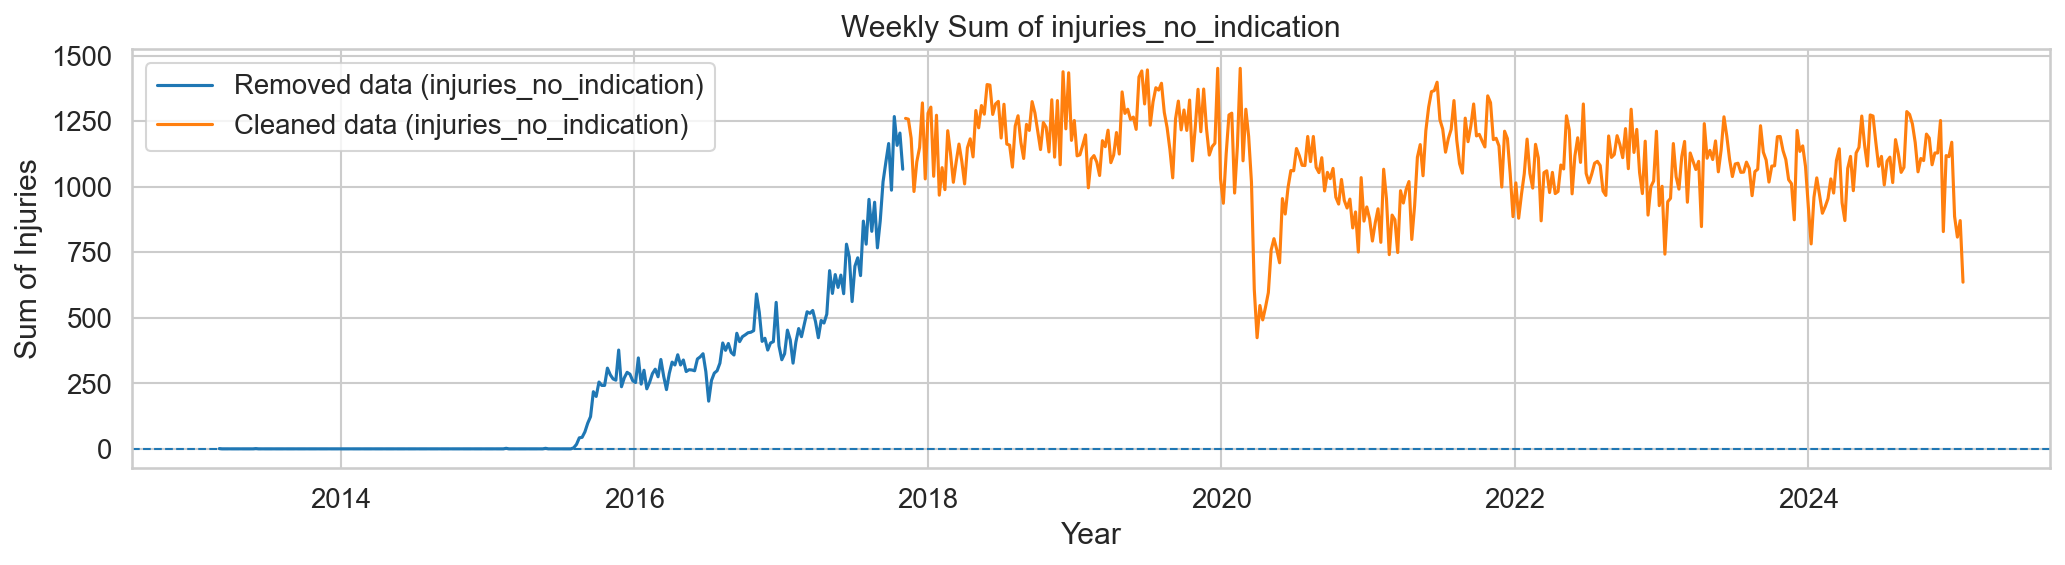

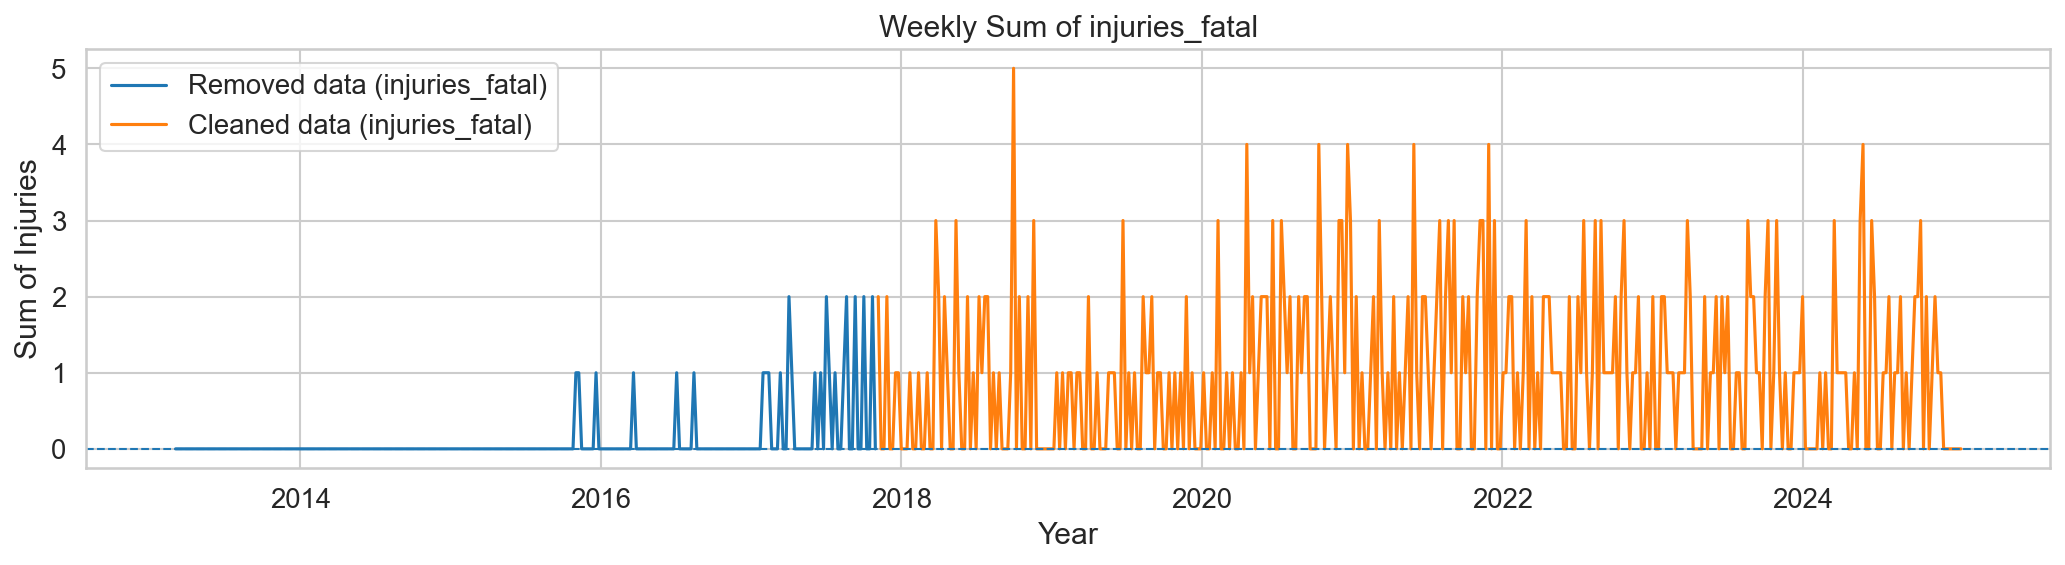

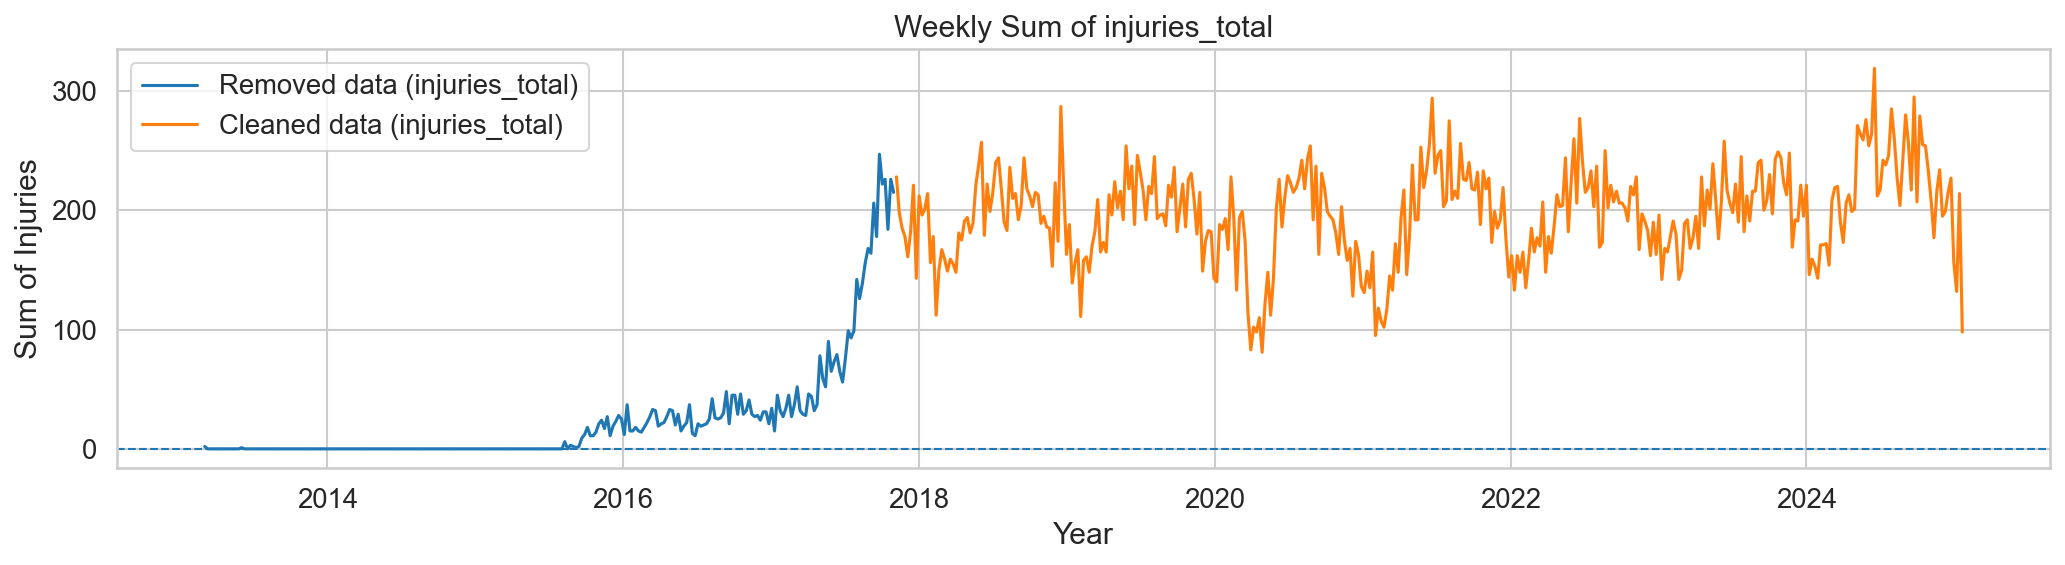

In [78]:
# Ensure datetime
df_plot = df_csv_data.copy()
df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])
df_cleaned = df_csv_data_cleaned.copy()
df_cleaned["crash_date"] = pd.to_datetime(df_cleaned["crash_date"])

# Split removed data
df_removed = df_plot[df_plot["crash_date"] < "2017-11-01"]

# Concatenate for consistent weekly resampling
df_combined = pd.concat([df_removed, df_cleaned])

# Loop through injury columns
for col in col_names:
    if col not in df_plot.columns:
        print(f"Skipping {col}: column not found.")
        continue

    # Resample weekly over the full timeline
    weekly_sum = df_combined.set_index("crash_date")[col].resample("W-MON").sum()

    # Separate removed vs cleaned for plotting
    weekly_removed = weekly_sum.loc[weekly_sum.index < "2017-11-01"]
    weekly_cleaned = weekly_sum.loc[weekly_sum.index >= "2017-11-01"]

    # Plot
    plt.figure(figsize=(14, 4))
    plt.plot(weekly_removed.index, weekly_removed.values, label=f"Removed data ({col})")
    plt.plot(weekly_cleaned.index, weekly_cleaned.values, label=f"Cleaned data ({col})")
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title(f"Weekly Sum of {col}")
    plt.xlabel("Year")
    plt.ylabel("Sum of Injuries")
    plt.legend()
    plt.tight_layout()
    plt.show()


---
## B. Visualization and Exploratory Analysis (55 points)
---
**Assigned to Jeremia**
- Time-series visualizations (raw, smoothed, rolling mean or windowed views) (10 points)
- Distribution analysis with histograms and density style plots where applicable (10 points)
- Correlation analysis and heatmaps (Pearson and at least one alternative such as Spearman,
with short interpretation) (10 points)
- Daily or periodic pattern analysis (day-of-week, hour-of-day, seasonality indicators, or
test-cycle patterns) (15 points)
- Summary of observed patterns as short check statements (similar to True/False style)
with evidence (10 points)

---
## C. Probability and Event Analysis (45 points)
---
**Assigned to Tim**
- Threshold-based probability estimation for events (define event, justify threshold, compute
empirical probability) (15 points)
- Cross tabulation analysis for two variables (10 points)
- Conditional probability analysis (at least two meaningful conditional relationships) (15
points)
- Summary of observations and limitations (what could bias these estimates, what assump-
tions were made) (5 points)

---
## D. Statistical Theory Applications (45 points)
---
**Assigned to Tim**
- Law of Large Numbers demonstration (15 points)
- Central Limit Theorem application (sampling distributions, effect of sample size, interpretation) (25 points)
- Result interpretation and sanity checks (what would invalidate your conclusion, what you verified) (5 points)

---
## E. Regression and Predictive Modeling (45 points)
---
**Assigned to Lorenz**
- Define a prediction target and features (justify why they make sense) (10 points)
- Linear or polynomial model selection (include rationale and show at least two candidates)
(10 points)
- Model fitting and validation (train-test split appropriate for time-series. e.g., time-based split) (15 points)
- Residual analysis and interpretation (errors, bias, failure cases, what to improve next) (10 points)

---
## F. Dimensionality Reduction and Statistical Tests (40 points)
---
**Assigned to Jeremia**
### Part 1. Dimensionality Reduction (25 points)
- PCA projection and interpretation (variance explained, what clusters or separations mean) (10 points)
- t-SNE embedding with justified hyperparameters (perplexity or similar) and interpretation (7 points)
- UMAP embedding with justified hyperparameters (neighbors, min dist or similar) and interpretation (8 points)
### Part 2. Hypothesis Tests (15 points)
Perform at least three tests. Each test must include: null hypothesis, why the test is appropriate, assumptions, p-value, and practical interpretation.
- Chi-square test (choose one):
    - Chi-square test of independence (use a contingency table from two categorical or binned variables), or
    - Chi-square goodness-of-fit (compare observed counts to an expected distribution you justify). (5 points)
- One mean or location comparison test (choose one): t-test, Welch t-test, Mann-Whitney U, or ANOVA (5 points)
- One time-series relevant test (choose one): stationarity test (ADF or KPSS), Ljung-Box for autocorrelation, or change-point style test if justified (5 points)